In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  

## I. Loading the data

Not much to see here.

In [2]:
Ks = [8, 10, 12]
dtypes = { "K": np.int32, "n": np.int32}
data = pd.concat([pd.read_table("test_{}.tsv".format(K), dtype=dtypes) for K in Ks]).set_index(["K", "n"])
data.votesCost = data.votesCost.apply(lambda x: pd.to_numeric(x.split(',')))

In [3]:
data.head()

voteStyle  budgetCost  \
K n                             
8 100      random      373199   
  100  transitive      809153   
  100       mixed     1711991   
  200      random      397106   
  200  transitive      809153   

                                               votesCost  
K n                                                       
8 100  [64207, 49207, 49207, 49207, 49207, 49207, 492...  
  100  [64207, 49207, 49207, 49207, 49207, 49207, 492...  
  100  [64207, 49207, 49207, 49207, 49207, 49207, 492...  
  200  [64207, 49207, 49143, 49207, 49207, 49207, 492...  
  200  [64207, 49207, 49207, 49207, 49207, 49207, 492...

## II. Power iteration

This is the "unit of work" which can't be subdivided, so we need to know this will come in under the gas limit always (i.e. there is no "voting attack" which can push the gas cost of the power iteration algorithm above the gas limit).

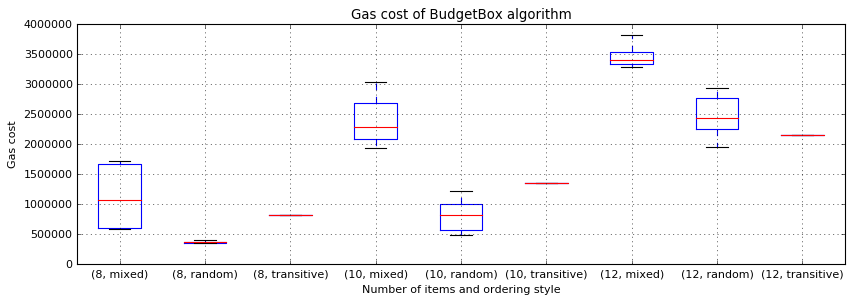

In [4]:
data.reset_index().boxplot(column="budgetCost", by=["K", "voteStyle"], figsize=[12,4])
plt.xlabel("Number of items and ordering style")
plt.ylabel("Gas cost")
plt.title("Gas cost of BudgetBox algorithm")
plt.suptitle("")
plt.show()

## III. Vote handling

We have more flexibility here; the goal is to "load" votes into a storage matrix in chunks to amortize the cost of setting storage variables. The challenge is finding the chunk sizes which give us the best performance. Bigger chunks are better, but takes us closer to the gas limit.

Note that the loading "chunk sizes" is set differently for different values of `K`:

- 8: 100
- 10: 50
- 12: 25

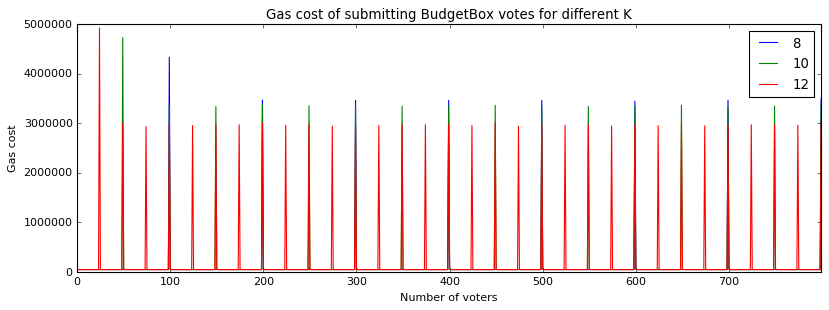

In [5]:
def f(K):
    pd.Series(data[data.voteStyle == "mixed"].ix[K, 800].votesCost)\
        .rename(K).plot(figsize=[12,4], legend=True)
            
f(8)
f(10)
f(12)

plt.xlabel("Number of voters")
plt.ylabel("Gas cost")
plt.title("Gas cost of submitting BudgetBox votes for different K")
plt.show()

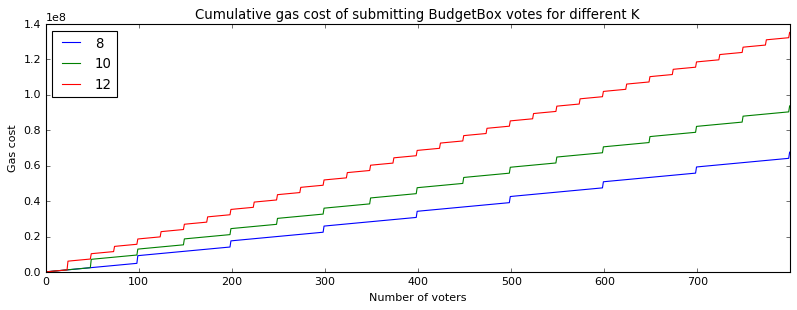

In [6]:
def f(K):
    pd.Series(data[data.voteStyle == "mixed"].ix[K, 800].votesCost)\
        .cumsum().rename(K).plot(figsize=[12,4], legend=True)
            
f(8)
f(10)
f(12)

plt.xlabel("Number of voters")
plt.ylabel("Gas cost")
plt.title("Cumulative gas cost of submitting BudgetBox votes for different K")
plt.show()

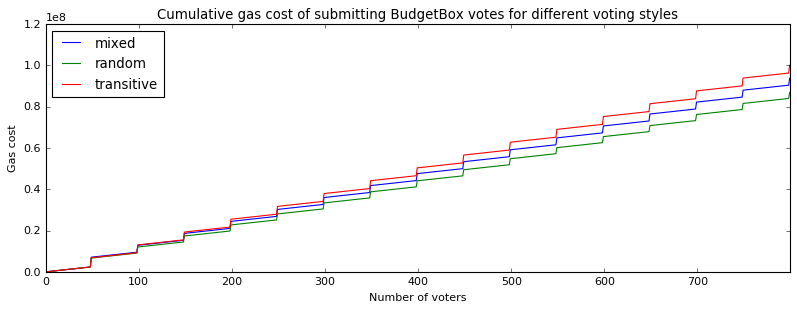

In [7]:
def f(style):
    pd.Series(data[data.voteStyle == style].ix[10, 800].votesCost)\
        .cumsum().rename(style).plot(figsize=[12,4], legend=True)

f("mixed")
f("random")
f("transitive")

plt.xlabel("Number of voters")
plt.ylabel("Gas cost")
plt.title("Cumulative gas cost of submitting BudgetBox votes for different voting styles")
plt.show()

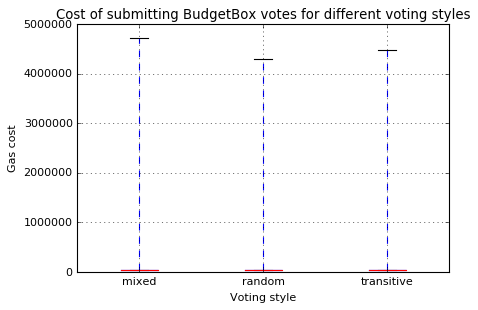

In [8]:
def f(style):
    return pd.Series(data[data.voteStyle == style].ix[10, 800].votesCost).rename(style)

pd.concat([
    f("mixed"),
    f("random"),
    f("transitive")  
], axis=1).boxplot()

plt.xlabel("Voting style")
plt.ylabel("Gas cost")
plt.title("Cost of submitting BudgetBox votes for different voting styles")
plt.show()